In [3]:
#importing the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR,SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble  import RandomForestRegressor,GradientBoostingRegressor
import warnings
warnings.filterwarnings(action='ignore')


In [4]:
#loading the dataset
df=pd.read_csv('/kaggle/input/pgh-traffic-prediction/pgh_train.csv')
#loading the dataset
df

,from.x,from.y,to.x,to.y,speed,time,is.weekday
0,-80.010193,40.439438,-80.009608,40.439757,27.603437,8,1
1,-79.975452,40.435881,-79.966978,40.435817,53.779673,8,1
2,-79.926506,40.427954,-79.911553,40.425766,39.520281,8,1
3,-80.010193,40.439438,-80.000976,40.436302,24.878792,8,1
4,-80.007891,40.448433,-80.004527,40.449137,41.973019,8,1
...,...,...,...,...,...,...,...
565,-79.895381,40.425906,-79.892002,40.427876,51.251842,20,0
566,-79.895487,40.426092,-79.891258,40.427202,38.864311,20,0
567,-79.895487,40.426092,-79.891258,40.427202,46.044388,20,0
568,-79.926933,40.426905,-79.927907,40.427623,23.390307,20,0


In [5]:
#getting the information in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   from.x      570 non-null    float64
 1   from.y      570 non-null    float64
 2   to.x        570 non-null    float64
 3   to.y        570 non-null    float64
 4   speed       570 non-null    float64
 5   time        570 non-null    int64  
 6   is.weekday  570 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 31.3 KB


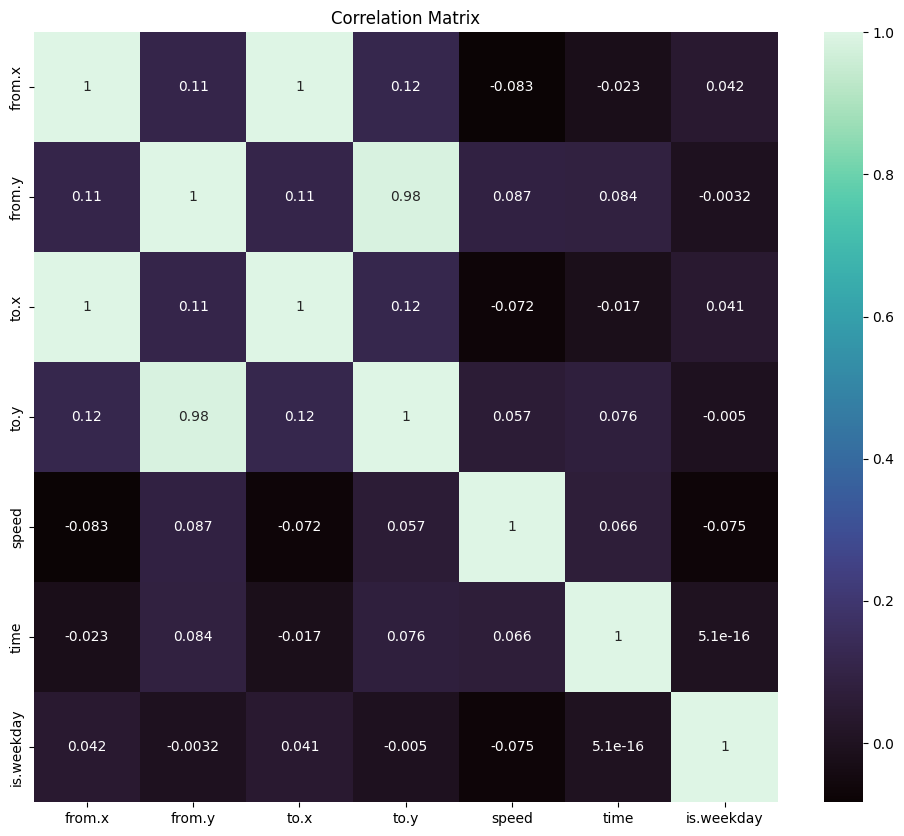

In [6]:
#visualizing the correlation in the dataset
corr=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cmap='mako')
plt.title('Correlation Matrix')
plt.show()

In [12]:
def preprocess_inputs(df):
    df=df.copy()
    #spitting the data between target and feature

    y=df['speed']
    x=df.drop('speed',axis=1)

    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123,shuffle=True)
    
    #scaling the dataset
    scaler=StandardScaler()

    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns,index=x_train.index)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns,index=x_test.index)
    
    return x_train,x_test,y_train,y_test

In [13]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(399, 6)
(171, 6)
(399,)
(171,)


In [11]:
#getting unique value in the feature
df['time'].unique()

array([ 8, 14, 20])

In [19]:
x_train

,from.x,from.y,to.x,to.y,time,is.weekday
42,-1.197230,-0.520222,-1.164204,-0.559713,-1.230907,0.997497
415,0.148336,-0.178079,0.133802,-0.192279,-0.006139,-1.002509
41,1.996407,-0.712444,1.949665,-0.699097,-1.230907,0.997497
560,-0.626401,0.029013,-0.647673,0.049302,1.218629,-1.002509
229,-0.706562,-0.109804,-0.712265,-0.129995,1.218629,0.997497
...,...,...,...,...,...,...
98,-0.492696,0.777406,-0.533557,0.793236,-0.006139,0.997497
322,-0.645672,0.399287,-0.644163,0.422909,-1.230907,-1.002509
382,-0.825631,-0.146738,-0.820697,-0.089510,-0.006139,-1.002509
365,-0.001126,-2.039605,-0.038486,-2.021578,-1.230907,-1.002509


In [15]:
y_train

42     30.566007
415    23.457032
41     51.268007
560    10.042626
229    15.496277
         ...    
98     56.769137
322    21.219868
382    25.339453
365    29.903944
510    30.656832
Name: speed, Length: 399, dtype: float64

In [30]:
models={'Linear Regression':LinearRegression(),
'K-Neighbors':KNeighborsRegressor(),
'Support Vector Machine (Linear Kernel)':LinearSVR(),
'Support Vector Machine (Non-Linear Kernel)':SVR(),
'Decision Tree':DecisionTreeRegressor(),
'Random Forest':RandomForestRegressor(),
'Gradient Boosting':GradientBoostingRegressor()}

In [31]:
models

{'Linear Regression': LinearRegression(),
 'K-Neighbors': KNeighborsRegressor(),
 'Support Vector Machine (Linear Kernel)': LinearSVR(),
 'Support Vector Machine (Non-Linear Kernel)': SVR(),
 'Decision Tree': DecisionTreeRegressor(),
 'Random Forest': RandomForestRegressor(),
 'Gradient Boosting': GradientBoostingRegressor()}

In [32]:
for name,model in models.items():
    print(name)
    model.fit(x_train,y_train)
    print('The score of {} is: {}'.format(name, model.score(x_test, y_test)))

    

Linear Regression
The score of Linear Regression is: 0.058875753719393686
K-Neighbors
The score of K-Neighbors is: 0.217032085910301
Support Vector Machine (Linear Kernel)
The score of Support Vector Machine (Linear Kernel) is: 0.006179551299621888
Support Vector Machine (Non-Linear Kernel)
The score of Support Vector Machine (Non-Linear Kernel) is: 0.08804167981996835
Decision Tree
The score of Decision Tree is: 0.6497921883728978
Random Forest
The score of Random Forest is: 0.6911784712290179
Gradient Boosting
The score of Gradient Boosting is: 0.627562632096514
